In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv"
df = pd.read_csv(url)
# df = pd.read_csv("data/train.csv")
'''
df.head()
df.shape
df.info()
df.isnull().sum().sort_values(ascending=False)
'''

# 결측치 처리
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 불필요 열 제거
drop_cols = ["PassengerId", "Name", "Lname", "Ticket", "Cabin"]
df = df.drop(columns=drop_cols)
df.head()

# 범주형 -> 숫자변환
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df_encoded.head()

# 데이터 시각화
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", data=df)
plt.title("Survived Count")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Sex")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Pclass")
plt.show()




,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


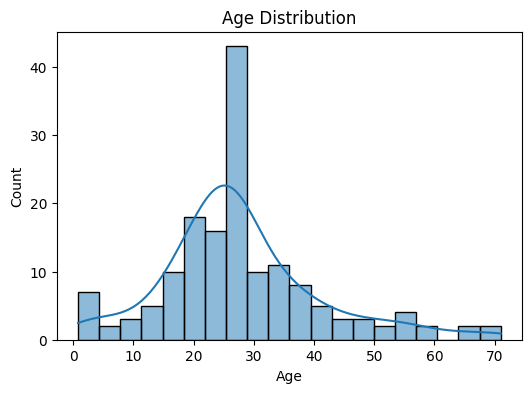

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv"
df = pd.read_csv(url)
# df = pd.read_csv("data/train.csv")
'''
df.head()
df.shape
df.info()
df.isnull().sum().sort_values(ascending=False)
'''

# 결측치 처리
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 불필요 열 제거
drop_cols = ["PassengerId", "Name", "Lname", "Ticket", "Cabin"]
df = df.drop(columns=drop_cols)
df.head()

# 범주형 -> 숫자변환
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df_encoded.head()


df["Survived"].mean()
df.groupby("Sex")["Survived"].mean()
df.groupby("Pclass")["Survived"].mean()
plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

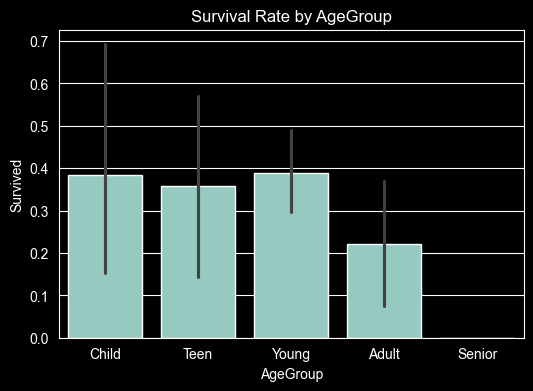

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv"
df = pd.read_csv(url)
# df = pd.read_csv("data/train.csv")
'''
df.head()
df.shape
df.info()
df.isnull().sum().sort_values(ascending=False)
'''

# 결측치 처리
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 불필요 열 제거
drop_cols = ["PassengerId", "Name", "Lname", "Ticket", "Cabin"]
df = df.drop(columns=drop_cols)
df.head()

# 범주형 -> 숫자변환
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df_encoded.head()

# 나이구간 만들기
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100],
                        labels=["Child","Teen","Young","Adult","Senior"])
df.groupby("AgeGroup", observed=True)["Survived"].mean()

# 시각화
plt.figure(figsize=(6,4))
sns.barplot(x="AgeGroup", y="Survived", data=df)
plt.title("Survival Rate by AgeGroup")
plt.show()

In [8]:
## Logistics regression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

url = "https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv"
df = pd.read_csv(url)
# df = pd.read_csv("data/train.csv")
'''
df.head()
df.shape
df.info()
df.isnull().sum().sort_values(ascending=False)
'''

# 결측치 처리
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 불필요 열 제거
drop_cols = ["PassengerId", "Name", "Lname", "Ticket", "Cabin"]
df = df.drop(columns=drop_cols)
df.head()

# 범주형 -> 숫자변환
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df_encoded.head()

# Training / Testing data
X = df_encoded.drop(columns=["Survived"])
y = df_encoded["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 로지스틱 회귀
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 모델 성능 평가
pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nReport:\n", classification_report(y_test, pred))


# 새로운 승객 예측
new_passenger = {
    "Pclass": 3,
    "Age": 22,
    "SibSp": 1,
    "Parch": 0,
    "Fare": 7.25,
    "Sex_male": 1,        # 남성
    "Embarked_Q": 0,
    "Embarked_S": 1       # S라고 가정
}

new_df = pd.DataFrame([new_passenger])[X.columns]  # 컬럼 순서 맞추기

pred_label = model.predict(new_df)[0]
pred_proba = model.predict_proba(new_df)[0][1]

print(f"Prediction: {'Survived' if pred_label == 1 else 'Did not survive'}")
print(f"Survival probability: {pred_proba:.2%}")

Accuracy: 0.84375
Confusion Matrix:
 [[19  2]
 [ 3  8]]

Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.80      0.73      0.76        11

    accuracy                           0.84        32
   macro avg       0.83      0.82      0.82        32
weighted avg       0.84      0.84      0.84        32

Prediction: Did not survive
Survival probability: 12.18%


In [11]:
## Logistics Regression with AgeGroup
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load data
url = "https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv"
df = pd.read_csv(url)

# Handle missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop unnecessary columns
drop_cols = ["PassengerId", "Name", "Lname", "Ticket", "Cabin"]
df = df.drop(columns=drop_cols)

# --- Create AgeGroup (instead of using Age directly) ---
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[0, 12, 18, 35, 60, 100],
    labels=["Child", "Teen", "Young", "Adult", "Senior"]
)

print("Survival rate by AgeGroup:")
print(df.groupby("AgeGroup", observed=True)["Survived"].mean())
print()

# Encode categorical variables (include AgeGroup)
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked", "AgeGroup"], drop_first=True)

# Features/target: drop Age because we use AgeGroup dummies instead
X = df_encoded.drop(columns=["Survived", "Age"])
y = df_encoded["Survived"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nReport:\n", classification_report(y_test, pred))

# ---- Predict a new passenger using AgeGroup instead of Age ----
new_passenger = {
    "Pclass": 3,
    "SibSp": 1,
    "Parch": 0,
    "Fare": 7.25,
    "Sex_male": 1,      # male
    "Embarked_Q": 0,
    "Embarked_S": 1,
    # AgeGroup dummies (drop_first=True means "Child" is the reference category)
    "AgeGroup_Teen": 0,
    "AgeGroup_Young": 1,
    "AgeGroup_Adult": 0,
    "AgeGroup_Senior": 0
}

# Build row with all model columns (missing columns filled with 0)
new_df = pd.DataFrame([new_passenger])
new_df = new_df.reindex(columns=X.columns, fill_value=0)

pred_label = model.predict(new_df)[0]
pred_proba = model.predict_proba(new_df)[0][1]

print("\nNew passenger prediction:", "Survived" if pred_label == 1 else "Did not survive")
print(f"Survival probability: {pred_proba:.2%}")

Survival rate by AgeGroup:
AgeGroup
Child     0.384615
Teen      0.357143
Young     0.387755
Adult     0.222222
Senior    0.000000
Name: Survived, dtype: float64

Accuracy: 0.84375
Confusion Matrix:
 [[19  2]
 [ 3  8]]

Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        21
           1       0.80      0.73      0.76        11

    accuracy                           0.84        32
   macro avg       0.83      0.82      0.82        32
weighted avg       0.84      0.84      0.84        32


New passenger prediction: Did not survive
Survival probability: 13.85%


In [1]:
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Load and prepare data
url = "https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv"
df = pd.read_csv(url)

# Handle missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Drop unnecessary columns
drop_cols = ["PassengerId", "Name", "Lname", "Ticket", "Cabin"]
df = df.drop(columns=drop_cols)

# Create AgeGroup BEFORE encoding
df["AgeGroup"] = pd.cut(df["Age"], bins=[0, 12, 18, 35, 60, 100],
                        labels=["Child","Teen","Young","Adult","Senior"])

# Encode categorical variables (including AgeGroup)
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked", "AgeGroup"], drop_first=True)

# Prepare features and target
X = df_encoded.drop(columns=["Survived", "Age"])  # Drop Age since we're using AgeGroup
y = df_encoded["Survived"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Evaluate
pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("\nReport:\n", classification_report(y_test, pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Decision Tree Accuracy: 0.71875
Confusion Matrix:
 [[16  5]
 [ 4  7]]

Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        21
           1       0.58      0.64      0.61        11

    accuracy                           0.72        32
   macro avg       0.69      0.70      0.69        32
weighted avg       0.73      0.72      0.72        32


Feature Importance:
            feature  importance
4          Sex_male    0.445659
3              Fare    0.348182
0            Pclass    0.050259
7     AgeGroup_Teen    0.042206
1             SibSp    0.038688
8    AgeGroup_Young    0.028225
5        Embarked_Q    0.024180
6        Embarked_S    0.022601
2             Parch    0.000000
9    AgeGroup_Adult    0.000000
10  AgeGroup_Senior    0.000000


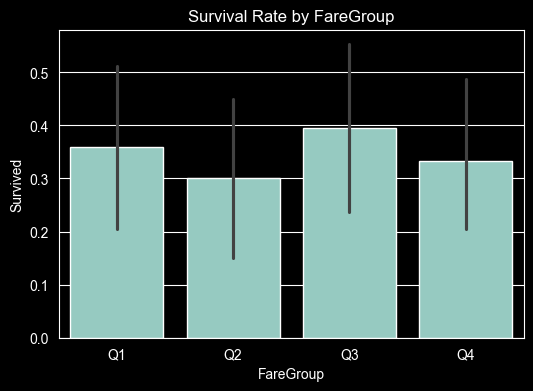

In [10]:
# EDA with FareGroup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://gist.githubusercontent.com/jwalsh/ce1dc0436aba5b7a5c9666f47fa5a380/raw/5ce3854392b43ff97907112d344fc008229b0445/titanic.csv"
df = pd.read_csv(url)
# df = pd.read_csv("data/train.csv")
'''
df.head()
df.shape
df.info()
df.isnull().sum().sort_values(ascending=False)
'''

# 결측치 처리
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 불필요 열 제거
drop_cols = ["PassengerId", "Name", "Lname", "Ticket", "Cabin"]
df = df.drop(columns=drop_cols)
df.head()

# 범주형 -> 숫자변환
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked"], drop_first=True)
df_encoded.head()

# Use quartiles (4 equal-sized groups)
df["FareGroup"] = pd.qcut(df["Fare"],
                          q=4,
                          labels=["Q1", "Q2", "Q3", "Q4"])

# 시각화
plt.figure(figsize=(6,4))
sns.barplot(x="FareGroup", y="Survived", data=df)
plt.title("Survival Rate by FareGroup")
plt.show()